In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import time
import json
import pandas as pd
from ctypes import c_int32

w = 2000.0; d = 4.60517018599; 37430.8232717 Bytes


# Count-Min Classes

In [330]:
# bin_string = bin(-2746531284 & 0b11111111111111111111111111111111)
# # bin_string = bin(3293670138 & 0b11111111111111111111111111111111)
# print(bin_string)
# print(int(bin_string,2))
# print(int32(-2746531284))
# # np.iinfo(np.int32).max

hF = H3HashFunctions(5, 615)
hF.q_matrices = np.asarray([-2842303426,-1641856884,-2077552853,-709073777,-1133909913,87263908,265162578,-3007512526,2831458740,-1565122518,-3795097470,-1962615057,3089147787,665291828,-1864994036,2060679046,3332416437,-758473397,-2527274940,-1130756255,-1629260965,2679862356,-4017896504,-2037467786,-1882233030,-689593736,-3103347297,-741477792,-1892830273,-3741423857,780613051,-2788682552,-1239715081,-580622939,-1031166304,905497406,2707068329,2663572620,-856880821,2250203181,-3781908386,2078457650,-4284359340,-1141704278,-2507915588,3717153329,-836913197,3987086869,-1134576198,2641042968,2321344850,-819725654,-3565952617,133523398,2500517552,1093366283,3210558046,4024125795,-241986342,-651949527,-152818611,108805252,3545425102,-1428138549,-1859509740,1248019102,-2412512569,2605492112,-239068439,-4060172655,3114024620,2841922943,-4142527027,850370859,1498052134,1372336615,2028914729,-3179891830,3945033418,-443535009,2572696460,-2600608044,-1357874778,-1026790729,2191768971,623581427,3185626322,-2812601312,-2674624775,-800099742,1043810499,-2504870900,1820991730,3556171525,3904403014,-3134516955,1983092545,3419763423,3910034109,-2470474014,2599074127,-3741651302,3653812358,2597965581,-995210018,-1847505683,1352844344,-1459509971,845357317,-496057908,386734321,2889650699,3517535641,955809954,-1567721877,-2360720528,1144328231,2144763969,3965652764,2575994324,3680586621,-462935733,-584983514,2539422587,-675881978,90339958,-99155466,-3369834687,-727658839,-1978548868,801279527,2027712122,-1764687595,-1759762657,-2394070151,-329665417,2226487340,-870806939,-436247845,-679455285,-1517638349,-1187974534,-3036811926,-1420512499,3022103064,3092197852,498469505,1646299987,-936734849,1168890245,3574461152,-2613728657,2030621113,1680469875,1774791429,4246829661,-4136702015,2750928545,-2726837298,-2924375480]).reshape((5,32))

print(hF.hashF(100))
print(hF.hashF(45265))
print(hF.hashF(0))
print(hF.hashF(-78956))
print(hF.hashF(-10000))

[471  83 283  43 331]
[450 343 444 257 538]
[514 259 173 446  50]
[514 183 158 260 434]
[549 559 448  43  50]


In [2]:
def int32(val):
    if val >= -2147483648 and val <= 2147483647:
        return val
    return c_int32(val).value
#         if val >= -2147483648 and val <= 2147483647:
#             return val
#         bin_string = bin(val & 0b11111111111111111111111111111111)
#         int_val = int(bin_string,2)
#         if int_val > 2147483647:
#             return -(~(int_val-1)%4294967296)
#         return int_val


# f1 = 2110608470
# f2 = 3114024620
# print(f1 ^ f2)

# # intN(f1 ^ f2, 32) 

# n1 = f1 ^ f2
# bin_n1 = ""
# for i in np.arange(32):
#     bin_n1 += str(n1&1)
#     n1>>=1
# print(bin_n1[::-1])
# print(int(bin_n1[::-1],2))
# print(int32(f1 ^ f2))
# np.abs(-2746531284) > 2**31-1

# print(int('{:032b}'.format(3293670138),2))
# print(bin(3293670138 & 0b11111111111111111111111111111111))
# print(bin(1146186490 & 0b11111111111111111111111111111111))
# print(bin(-1001297158 & 0b11111111111111111111111111111111))
# print(-(~(3293670138-1)%2**32))
# 0b11000100010100010110101011111010

In [3]:
class H3HashFunctions:
    
    def __init__(self, numFunctions=0, limit=0, seed=42, bits=32, json_dic=None):
        if json_dic == None:
            self.numFunctions = numFunctions
            self.seed = seed
            self.limit = limit
            self.bits = int(bits) 
            if self.bits == 64:
                self.q_matrices = np.random.randint(int(-2**63+1),int(2**63-1),size=(numFunctions,64), dtype='int64')
            elif self.bits < 64 and self.bits > 32:
                self.q_matrices = np.random.randint(int(-2**(self.bits-1)+1),int(2**(self.bits-1)-1),size=(numFunctions,self.bits), dtype='int64')
            elif self.bits == 32:
                ii32 = np.iinfo(np.int32)
                self.q_matrices = np.random.randint(ii32.min,ii32.max,size=(numFunctions,self.bits), dtype=np.int32) 
            elif self.bits < 32:  
                self.q_matrices = np.random.randint(int(-2**(self.bits-1)+1),int(2**(self.bits-1)-1),size=(numFunctions,self.bits), dtype=np.int32) 
            else:
                print(self.bits)
        else:
            self.numFunctions = json_dic["numFunctions"]
            self.limit = json_dic["limit"]
            self.bits = json_dic["bits"]
            self.q_matrices = np.asarray(json_dic["q_matrices"])
            
    def hashF(self, inp):
        if inp == 0:
            inp = 2**self.bits-1
        result = np.zeros(self.numFunctions, dtype=int)
        inp_copy = inp
        for i in np.arange(self.numFunctions, dtype=int):
            current = 0
            for k in np.arange(self.bits, dtype=int):
                if inp_copy == 0:
                    break
                current = current ^ ((1 & inp_copy) * self.q_matrices[i][k])
#                 current = int32(current)
#                 print("function: {}, bit: {}, current: {}, last: {}, change: {}".format(i, k, current, (1 & inp_copy),((1 & inp_copy) * self.q_matrices[i][k])))
                inp_copy >>= 1 
#             print("")
            result[i] = int(current)
            if (current < 0):
                current = -1 * current
            if (self.limit > 0):
                result[i] = int(current % self.limit)
            else:
                result[i] = int(current)
            
            inp_copy = inp
        return result

#     def toJSON(self):
#         return json.dumps(self.__dict__, cls=ComplexEncoder)
        
    def to_string(self):
        print("H3HashFunctions\nnumFunctions = "+str(self.numFunctions)+"\nq_matrices = "+str(self.q_matrices))

In [4]:
class CountMinSketch:
    
    def __init__(self, width=-1, height=-1, eps=0.0, delta=0.0, minNum=-2**31, maxNum=2**31-1, level=0, seed=42, ntype='int32', json_dic=None):
        if json_dic == None:
            if(ntype == 'int32'):
                self.bits = 32  
            elif (ntype == 'int64'):
                self.bits = 64
            self.elementsProcessed = 0
            self.level = level

            if(width > 0 and height > 0 and eps==0.0 and delta==0.0):
                self.width = width
                self.height = height
                self.exactCounters = False
            elif(width <= 0 and height <= 0 and eps>0.0 and delta>0.0):
                self.minNum = minNum
                self.maxNum = maxNum
                possibleValues = maxNum - minNum
                self.width = int(np.ceil(np.log(possibleValues)/eps))
                self.height = int(np.ceil(np.log(1.0/delta)))
                if(self.width*self.height > possibleValues):
    #                 print("For the required epsilon = "+str(eps)+", and delta = "+str(delta)+", and "+str(maxNum)+" diferent elements is better to use exact counters instead of a Count-Min Sketch")
                    self.counters = np.zeros(possibleValues, dtype=int)
                    self.hashFunctions = None
                    self.exactCounters = True
                else:
                    self.exactCounters = False
    #             print(str(self.width)+"   :;   "+str(self.height))
            else:
                raise Exception("Define either a valid width and height or a valid epsilon and delta.")
            if(self.exactCounters == False):
                self.seed = seed
                self.hashFunctions = H3HashFunctions(self.height,self.width,self.seed,self.bits)
                self.counters = np.zeros((self.height, self.width), dtype=int)
        else:
            self.bits = json_dic["bits"] 
            self.elementsProcessed = json_dic["elementsProcessed"]
            self.width = json_dic["width"]
            self.height = json_dic["height"]
            self.exactCounters = json_dic["exactCounters"]
            self.minNum = json_dic["minNum"]
            self.maxNum = json_dic["maxNum"]
            self.counters = np.asarray(json_dic["counters"])
            self.hashFunctions = H3HashFunctions(json_dic=json_dic["hashFunctions"])
            self.level = level
            
        
    def update(self, element):
        element = int(element/2**self.level)
        if(self.exactCounters):
            if(element >= self.minNum and element <= self.maxNum ):
                idx = self.getIndex(element)
                self.counters[idx] += 1
            else:
                return
        else:
            indices = self.hashFunctions.hashF(element)
            temp = 0
            for idx in indices:
                self.counters[temp][idx]+=1
                temp+=1
        self.elementsProcessed+=1
        
    def getIndex(self, element):
        return element-self.minNum
        
    def query(self, element):
        element = int(element/2**self.level)
        if(self.exactCounters):
            if(element >= self.minNum and element <= self.maxNum ):
                idx = self.getIndex(element)
                return self.counters[idx]
            else:
                return 0
        else:
            result = 2**self.bits-1
            indices = self.hashFunctions.hashF(element)
            temp = 0
            for idx in indices:
                if (self.counters[temp][idx] < result):
                    result = self.counters[temp][idx]
                temp+=1
            return result
        
    def query_interval(self, low, high):
        result = 0
        for val in np.arange(low, high+1):
            result += self.query(val)
        return result
        
    def query_buckets(self, buckets):
        result = np.zeros(len(buckets))
        i = 0
        for b in buckets:
            result[i] = self.query_interval(b.low, b.high)
            i+=1
        return result
        
    def to_string(self, showMatrix=True):
        if(self.exactCounters):
            if showMatrix:
                return("Exact counter\nprocessed elements = "+str(self.elementsProcessed)+"\n"+str(self.counters))
            else:
                return("Exact counter\nprocessed elements = "+str(self.elementsProcessed))
        else:
            if showMatrix:
                return("Count-Min Sketch\nheight = "+str(self.height)+" width = "+str(self.width)+" ; processed elements = "+str(self.elementsProcessed)+"\n"+str(self.counters))
            else:
                return("Count-Min Sketch\nheight = "+str(self.height)+" width = "+str(self.width)+" ; processed elements = "+str(self.elementsProcessed))

# Bar Chart DMAP

In [5]:
class DyadicRange:
        
    def __init__(self, low, high):
        self.low = low
        self.high = high
        lev = np.log2(np.abs(high-low)+1)
        lev_int = int(lev)
        if lev_int != lev:
            raise Exception("ERROR: not a dyadic range! Level cannot be "+str(lev))
        self.level = lev_int
        self.index = int(np.floor(low/(2**self.level))) 
    
    def __str__(self):
        return "[ "+str(self.low)+", "+str(self.high)+" ]"
            
class numericRange:
    
    def __init__(self, low, high):
            self.low = low
            self.high = high
            
    def __str__(self):
        return "[ "+str(self.low)+", "+str(self.high)+" ]"

In [6]:
class DyadicCountMinSketch:
    
    def __init__(self, eps=0.015, delta=0.01, minNum=-46340, maxNum=46340, seed=42, ntype='int32', json_dic=None):
        if json_dic == None:
            self.minNum = minNum
            self.maxNum = maxNum
            s = list()
            for i in np.arange(int(np.log2(maxNum+1))):
                current_maxNum = int(maxNum/(2**i))+1
                current_minNum = int(minNum/(2**i))+1
    #             print("level "+str(i)+" : "+str(current_maxNum))
                s.append(CountMinSketch(eps=eps, delta=delta, minNum=current_minNum, maxNum=current_maxNum, level=i))
            self.cm_sketches = np.asarray(s)

    #             self.level = level
    #             self.index = index
    #             self.low = (2**level)*index
    #             self.high = (2**level)*index+1
        else:
            self.minNum = json_dic["minNum"]
            self.maxNum = json_dic["maxNum"]
            s = list()
            for i, cm in enumerate(json_dic["cm_sketches"]):
                s.append(CountMinSketch(level=i, json_dic=cm))
            self.cm_sketches = np.asarray(s)
        
    def update(self, element):
        for cms in self.cm_sketches:
            cms.update(element)
    
    def minimalDyadicCover(self, low, high):
        j = 0
        D = list()
        while low <= high:
            if (1 & (low>>j)) == 1:
#                 print("LOW "+str(j))
                D.append(DyadicRange(low,low+2**j-1))
                low = low+2**j
            if (1 & ((high)>>j)) == 0:
#                 print("HIGH "+str(j))
                D.append(DyadicRange(high-2**j+1,high))
                high = high-2**j
            j+=1
        return np.asarray(D)
    
    def query(self, element):
        return self.cm_sketches[0].query(element)
    
    def query_interval(self, low, high):
        D = self.minimalDyadicCover(low, high)
        result = 0
        for d in D:
            result += self.cm_sketches[d.level].query(d.index)
        return result
    
    def print_DyadicCover(self, D):
        for d in D:
            print("( "+str(d.low)+", "+str(d.high)+" )")
    
    def query_buckets(self, buckets):
        result = np.zeros(len(buckets))
        i = 0
        for b in buckets:
            result[i] = self.query_interval(b.low, b.high)
            i+=1
        return result
        
    def to_string(self, showMatrix=True):
        level = 0
        for cms in self.cm_sketches:
            print("Level "+str(level)+":  "+cms.to_string(showMatrix))
            level += 1
            

In [7]:
def calculateBucketRanges(minimum, maximum, bucketSize):
    buckets = list()
    current = minimum
    while current+bucketSize <= maximum:
        buckets.append(numericRange(current, current+bucketSize-1))
        current += bucketSize
    return np.asarray(buckets)

def count_buckets(exactCounter, buckets):
    result = np.zeros(len(buckets))
    i = 0
    for b in buckets:
        for element in np.arange(b.low, b.high+1):
            result[i] += exactCounter[element]
        i+=1
    return result


# def convertBucketsToLabels()

In [8]:
def create_and_compare_histogram(minimum, maximum, bucketSize, dyadicCountMinSketch, exactCounter):
    buckets = calculateBucketRanges(minimum, maximum, bucketSize)

    x = np.arange(len(buckets))  # the label locations
    width = 0.4  # the width of the bars
    
    estimates = dyadicCountMinSketch.query_buckets(buckets)
    counts = count_buckets(exactCounter, buckets)

    fig, ax = plt.subplots(1, 1, figsize=(16, 8))


#     rects1 = ax.bar(x - width/2, estimates, width, label='Count-Min Sketch estimate',fc='#DDC031')
#     rects2 = ax.bar(x + width/2, counts, width, label='Exact Counts',edgecolor='#DDC031',fc='none',hatch='/')
    
    rects1 = ax.bar(x - width/2, estimates, width, label='Count-Min Sketch estimate')
    rects2 = ax.bar(x + width/2, counts, width, label='Exact Counts')
    ax.set_xlabel('buckets')
    ax.set_ylabel('frequency')
    ax.set_xticks(x)
    plt.xticks(rotation=45)
    ax.set_xticklabels(buckets)


    ax.legend(loc = 'upper left')
    # fig.tight_layout()
    # ax.set_title('Condor vs Yahoo! DataSketches + Condor')
    # plt.legend()
    plt.show()

In [9]:
class CMSEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, H3HashFunctions):
            return dict(numFunctions=obj.numFunctions, limit=obj.limit, q_matrices=obj.q_matrices, bits=obj.bits)
        if isinstance(obj, CountMinSketch):
            return dict(bits=obj.bits, elementsProcessed=obj.elementsProcessed, width=obj.width, height=obj.height,
                       exactCounters=obj.exactCounters, minNum=obj.minNum, maxNum=obj.maxNum, counters=obj.counters,
                       hashFunctions=obj.hashFunctions, level=obj.level)
        if isinstance(obj, TupleCountMinSketch):
            return dict(bits=obj.bits, elementsProcessed=obj.elementsProcessed, width=obj.width, height=obj.height,
                       exactCounters=obj.exactCounters, counters=obj.counters, x_max_index=obj.x_max_index,
                       hashFunctions=obj.hashFunctions, level=obj.level)
        return json.JSONEncoder.default(self, obj)

In [16]:
dCMS = DyadicCountMinSketch()
jsonStr = json.dumps(dCMS.__dict__, indent=2, cls=CMSEncoder)
print(jsonStr)

{
  "cm_sketches": [
    {
      "exactCounters": false, 
      "maxNum": 46341, 
      "hashFunctions": {
        "bits": 32, 
        "q_matrices": [
          [
            1293183008, 
            1106814496, 
            1858260901, 
            -272687360, 
            10635801, 
            -719492483, 
            -1664166745, 
            834108877, 
            -956101977, 
            -867610693, 
            -604102667, 
            667806209, 
            1924864641, 
            -2060475833, 
            2103398065, 
            -1458608162, 
            1872419585, 
            -1757816518, 
            -1304822978, 
            -1552110286, 
            448156328, 
            265811622, 
            1279400495, 
            1922645336, 
            2108967522, 
            1519106692, 
            235242010, 
            -1662364153, 
            -887693715, 
            1841043390, 
            -1861623251, 
            -960375209
          ], 
          [
           

In [345]:
n = 10000
cms = CountMinSketch(eps=0.015, delta=0.01, minNum=0, maxNum=n)
jsonStr = json.dumps(cms.__dict__, cls=CMSEncoder)
print(jsonStr)
# isinstance(cms.hashFunctions, H3HashFunctions)

{"exactCounters": false, "maxNum": 10000, "hashFunctions": {"bits": 32, "q_matrices": [[-1900819865, 834622589, 705025368, 1363843978, -1482832188, 523125472, 2134281084, 556183868, -1836295916, 731367308, -2016768811, 1317082494, -375763637, -1746826072, 860380454, 466884418, 1728784981, -498072571, 1589670071, 1581152224, -82251161, -1711397227, 449103539, -1351164139, 1973717099, -1538966045, -359363742, 1850736876, -904963678, 1218587991, -1645924953, -776049096], [-1176653533, 1478558352, 1240015437, -1478080489, 451895019, 1656908368, -10563093, 1634369882, 1077054454, 549677106, 1981279001, -665735908, -494030828, 773455842, -1303362831, 577805024, -1783863380, -425590654, 1869141660, -1009238743, 1397260849, -1968054225, 674274173, 637691741, -1227122046, 1171888601, -1300179165, 119496568, -1262361323, 382147955, -1182843115, -1293734493], [588396737, -1702755929, -711796040, 1106984045, 2128559223, 2134658892, 496420599, 1536608766, 1599654411, -668687331, -334278802, -268007

In [10]:
# Test Count-Min sketch error

n = 10000
cms = CountMinSketch(eps=0.015, delta=0.01, maxNum=n)

counts = np.zeros(n)
m = 50000
elements = np.random.randint(n, size=m)
start = time.time()
for element in elements:
    
#     counts[element] += 1
    cms.update(element)
end = time.time()
print(end - start)

# print(cms.to_string(False))

# match = 0.0
# res = 0.0
# for i in np.arange(n):
#     res += np.abs(cms.query(i)-counts[i])/m
#     if(np.abs(cms.query(i)-counts[i]) < m * 0.05):
#         match += 1.0
# #     print(str(i)+" :  predicted = "+str(cms.query(i))+"  :  real = "+str(counts[i]))
# print(str(match)+"  ->  "+str(match/n*100.0))
# print(str(res/n))

KeyboardInterrupt: 

In [114]:
n = 10000

dCMS = DyadicCountMinSketch(maxNum=n)

counts = np.zeros(n)
m = 50000
for i in np.arange(m):
    element = np.random.randint(n)
    counts[element] += 1
    dCMS.update(element)


# dCMS.query_interval(101,200)

# DyadicRange(8,8)

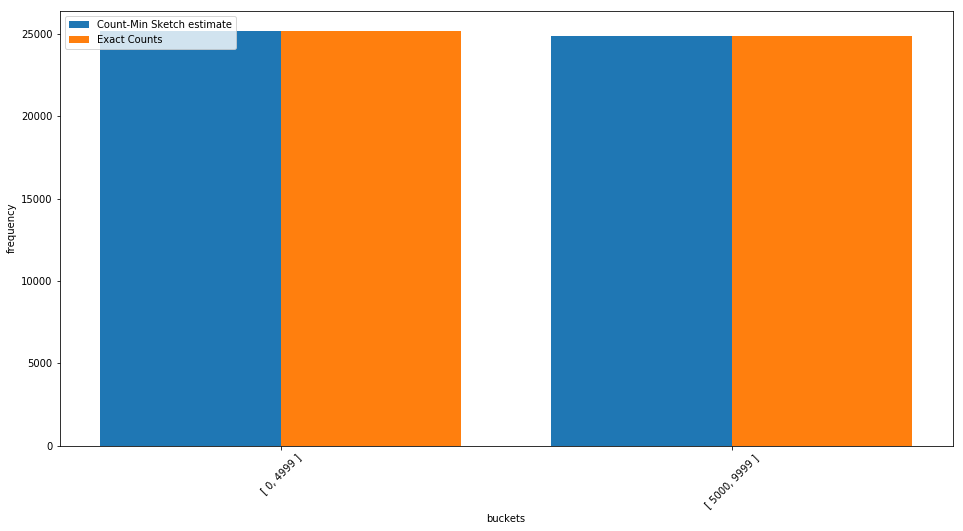

In [115]:
create_and_compare_histogram(0, n, 5000, dCMS, counts)

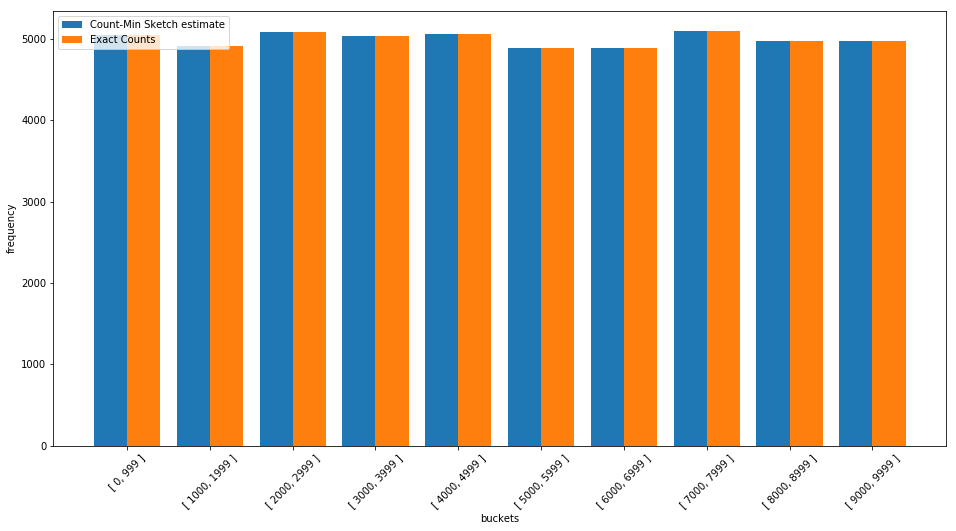

In [116]:
create_and_compare_histogram(0, n, 1000, dCMS, counts)

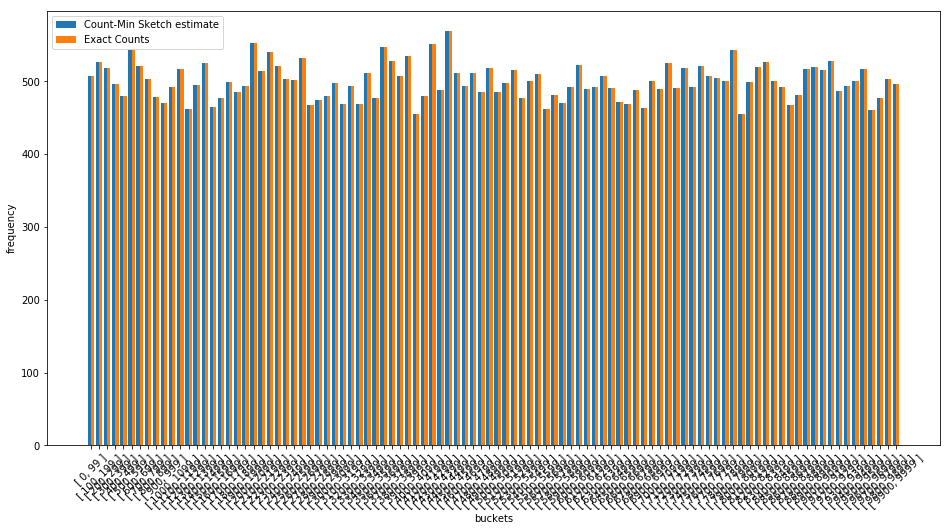

In [117]:
create_and_compare_histogram(0, n, 100, dCMS, counts)

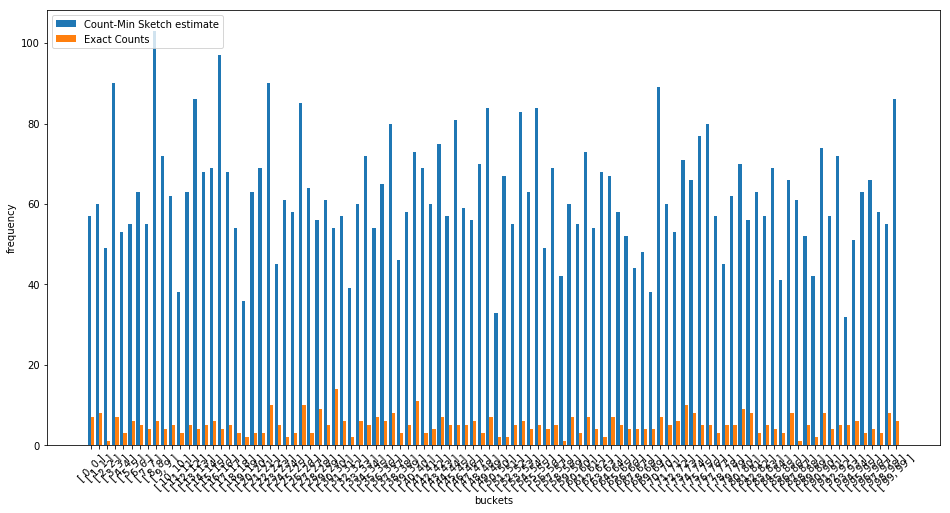

In [118]:
create_and_compare_histogram(0, 100, 1, dCMS, counts)

# Heat-Map DMAP

In [8]:
class TupleCountMinSketch:
    
    def __init__(self, width=-1, height=-1, eps=0.0, delta=0.0, x_axis_max=2**15-1, y_axis_max=2**15-1, level=0, seed=42):
        maxNum = x_axis_max*y_axis_max
        self.elementsProcessed = 0
        self.level = level
        self.bits = np.ceil(np.log2(float(maxNum)))
        self.x_max_index = x_axis_max
        
        if(width > 0 and height > 0 and eps==0.0 and delta==0.0):
            self.width = width
            self.height = height
            self.exactCounters = False
        elif(width <= 0 and height <= 0 and eps>0.0 and delta>0.0):
            self.width = int(np.ceil(np.log(float(maxNum))/eps))
            self.height = int(np.ceil(np.log(1.0/delta)))
            if(self.width*self.height > maxNum):
#                 print("For the required epsilon = "+str(eps)+", and delta = "+str(delta)+", and "+str(maxNum)+" diferent elements is better to use exact counters instead of a Count-Min Sketch")
                self.counters = np.zeros(maxNum, dtype=int)
                self.exactCounters = True
                self.hashFunctions = None
            else:
                self.exactCounters = False
#             print(str(self.width)+"   :;   "+str(self.height))
        else:
            raise Exception("Define either a valid width and height or a valid epsilon and delta.")
        if(self.exactCounters == False):
            self.seed = seed
#             print(self.bits)
            self.hashFunctions = H3HashFunctions(self.height,self.width,self.seed,self.bits)
            self.counters = np.zeros((self.height, self.width), dtype=int)
        
        
    def update(self, x, y):
        x = int(x/2**self.level)
        y = int(y/2**self.level)
        grid = y*self.x_max_index+x
        
        if(self.exactCounters):
            self.counters[grid] += 1
        else:
            indices = self.hashFunctions.hashF(grid)
            temp = 0
            for idx in indices:
                self.counters[temp][idx]+=1
                temp+=1
        self.elementsProcessed+=1
        
    def query_with_index(self, index):
        grid = index
        
        if(self.exactCounters):
            return self.counters[grid]
        else:
            result = 2**self.bits-1
            indices = self.hashFunctions.hashF(grid)
            temp = 0
            for idx in indices:
                if (self.counters[temp][idx] < result):
                    result = self.counters[temp][idx]
                temp+=1
            return result
        
    def query(self, x, y):
        x = int(x/2**self.level)
        y = int(y/2**self.level)
        grid = y*self.x_max_index+x
        
        if(self.exactCounters):
            return self.counters[grid]
        else:
            result = 2**self.bits-1
            indices = self.hashFunctions.hashF(grid)
            temp = 0
            for idx in indices:
                if (self.counters[temp][idx] < result):
                    result = self.counters[temp][idx]
                temp+=1
            return result
        
    def query_grids(self, grids):
        result = np.zeros(np.shape(grids))
        i = 0
        k = 0
        for row in grids:
            for cell in row:
                for x in np.arange(cell.x_low, cell.x_high+1):
                    for y in np.arange(cell.y_low, cell.y_high+1):
                        result[k,i] += self.query(x,y)
                i+=1
            i = 0
            k += 1
        return result
        
    def to_string(self, showMatrix=True):
        if(self.exactCounters):
            if showMatrix:
                return("Exact counter\nprocessed elements = "+str(self.elementsProcessed)+"\n"+str(self.counters))
            else:
                return("Exact counter\nprocessed elements = "+str(self.elementsProcessed))
        else:
            if showMatrix:
                return("Count-Min Sketch\nheight = "+str(self.height)+" width = "+str(self.width)+" ; processed elements = "+str(self.elementsProcessed)+"\n"+str(self.counters))
            else:
                return("Count-Min Sketch\nheight = "+str(self.height)+" width = "+str(self.width)+" ; processed elements = "+str(self.elementsProcessed))

In [26]:
tcms = TupleCountMinSketch(eps=0.015, delta=0.01)
jsonStr = json.dumps(tcms.__dict__, indent=2, cls=CMSEncoder)
text_file = open("json/tcms_test.json", "w")
n1 = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

{
  "exactCounters": false, 
  "hashFunctions": {
    "bits": 30, 
    "q_matrices": [
      [
        26609288, 
        401436609, 
        -120274929, 
        -31050700, 
        487916547, 
        518195384, 
        60783676, 
        494309164, 
        -58959069, 
        -458403829, 
        -519184967, 
        302298062, 
        467739744, 
        252975940, 
        -426701356, 
        -26607964, 
        -363412484, 
        -179655628, 
        -93789299, 
        -115971851, 
        -161379237, 
        -381858294, 
        -190677778, 
        -51980781, 
        -141487407, 
        -431229883, 
        -295698717, 
        274406169, 
        428724625, 
        58413507
      ], 
      [
        -170797374, 
        -332378210, 
        367381917, 
        6769310, 
        298594003, 
        -62201962, 
        85001261, 
        262668191, 
        -526983483, 
        366492119, 
        321818536, 
        -341085306, 
        -474120274, 
        -36302923

In [17]:
class PlaneDyadicRange:
        
    def __init__(self, x_low, x_high, y_low, y_high, x_max_index=0):
        if np.abs(x_high-x_low) != np.abs(y_high-y_low):
            raise Exception("ERROR: not a plane dyadic range! x and y boundaries don't have the same difference.\nx("+str(x_low)+", "+str(x_high)+")  :  y("+str(y_low)+", "+str(y_high)+")")
            
        self.x_low = x_low
        self.x_high = x_high
        self.y_low = y_low
        self.y_high = y_high
        
        lev = np.log2(np.abs(x_high-x_low)+1)
        lev_int = int(lev)
        if lev_int != lev:
            raise Exception("ERROR: not a dyadic range! Level cannot be "+str(lev))
        self.level = lev_int
        x = int(x_low/2**self.level)
        y = int(y_low/2**self.level)
        if x_max_index == 0:
            print("ups")
            x_max_index = int((2**15-1)/(2**self.level))+1
        self.index = int(y*x_max_index+x)

def plot_planeDyadicCover(planeDyadicCover, border=1):
    fig,ax = plt.subplots(figsize=(8, 8))
    currentAxis = plt.gca()
    count = 0
    for dyadic_plane in planeDyadicCover:            
        currentAxis.add_patch(Rectangle((dyadic_plane.x_low, dyadic_plane.y_low), 2**dyadic_plane.level, 2**dyadic_plane.level,
                      alpha=1, fill=None))
        count +=1
    print(count)
    currentAxis.axis('equal')
    plt.show()

In [10]:
class TupleDyadicCountMinSketch:
    
    def __init__(self, eps=0.015, delta=0.01,  x_axis_max=2**15-1, y_axis_max=2**15-1, seed=42):
        s = list()
        log_x = int(np.log2(x_axis_max+1))
        log_y = int(np.log2(y_axis_max+1))
        log = int(np.log2(y_axis_max+1))
        if log_x >= log_y:
            log = log_x
#         else:
#             log = log_y
        
        for i in np.arange(log):
            current_x_max = int(x_axis_max/(2**i))+1
            current_y_max = int(y_axis_max/(2**i))+1
#             print("level "+str(i)+" : "+str(current_maxNum))
            s.append(TupleCountMinSketch(eps=eps, delta=delta,  x_axis_max=current_x_max, y_axis_max=current_y_max, level=i))
        self.cm_sketches = np.asarray(s)
            
#             self.level = level
#             self.index = index
#             self.low = (2**level)*index
#             self.high = (2**level)*index+1
        
    def update(self, x, y):
        for cms in self.cm_sketches:
            cms.update(x, y)
    
    def minimalDyadicCover(self, low, high):
        j = 0
        D = list()
        while low <= high:
            if (1 & (low>>j)) == 1:
#                 print("LOW "+str(j))
                D.append(DyadicRange(low,low+2**j-1))
                low = low+2**j
            if (1 & ((high)>>j)) == 0:
#                 print("HIGH "+str(j))
                D.append(DyadicRange(high-2**j+1,high))
                high = high-2**j
            j+=1
        return np.asarray(D)
    
    def planeMinimalDyadicCover(self, x_low, x_high, y_low, y_high):
        dyadic_cover_x = self.minimalDyadicCover(x_low, x_high)
        dyadic_cover_y = self.minimalDyadicCover(y_low, y_high)

        D = list()
        for dyadic_x in dyadic_cover_x:
            for dyadic_y in dyadic_cover_y:
    #             print("x( "+str(dyadic_x.low)+", "+str(dyadic_x.high)+" )  :  y( "+str(dyadic_y.low)+", "+str(dyadic_y.high)+" )")
                if dyadic_x.level < dyadic_y.level:
                    diff = int(2**dyadic_y.level/2**dyadic_x.level)
                    step = 2**dyadic_x.level-1
                    y_current = dyadic_y.low
                    for i in np.arange(diff):
                        D.append(PlaneDyadicRange(x_low=dyadic_x.low, x_high=dyadic_x.high, y_low=y_current, y_high=y_current+step, x_max_index=self.cm_sketches[dyadic_x.level].x_max_index))
                        y_current += step+1
                elif dyadic_x.level > dyadic_y.level:
                    diff = int(2**dyadic_x.level/2**dyadic_y.level)
                    step = 2**dyadic_y.level-1
                    x_current = dyadic_x.low
                    for i in np.arange(diff):
                        D.append(PlaneDyadicRange(x_low=x_current, x_high=x_current+step, y_low=dyadic_y.low, y_high=dyadic_y.high, x_max_index=self.cm_sketches[dyadic_y.level].x_max_index))
                        x_current += step+1
                else:
                    D.append(PlaneDyadicRange(x_low=dyadic_x.low, x_high=dyadic_x.high, y_low=dyadic_y.low, y_high=dyadic_y.high, x_max_index=self.cm_sketches[dyadic_x.level].x_max_index))
        return np.asarray(D)
    
    def query(self, element):
        return self.cm_sketches[0].query(element)
    
    def query_plane(self, x_low, x_high, y_low, y_high):
        D = self.planeMinimalDyadicCover(x_low, x_high, y_low, y_high)
        result = 0
        for d in D:
            result += self.cm_sketches[d.level].query_with_index(d.index)
        return result
    
    def query_grids(self, grids):
        result = np.zeros(np.shape(grids))
        i = 0
        k = 0
        for row in grids:
            for cell in row:
                result[k,i] += self.query_plane(cell.x_low, cell.x_high, cell.y_low, cell.y_high)
                i+=1
            i = 0
            k += 1
        return result
        
    def to_string(self, showMatrix=True):
        level = 0
        for cms in self.cm_sketches:
            print("Level "+str(level)+":  "+cms.to_string(showMatrix))
            level += 1

In [11]:
class numericGrid:
    
    def __init__(self, x_low, x_high, y_low, y_high):
            self.x_low = x_low
            self.x_high = x_high
            self.y_low = y_low
            self.y_high = y_high
            
    def __str__(self):
        return "y [ "+str(self.y_low)+", "+str(self.y_high)+" ] x [ "+str(self.x_low)+", "+str(self.x_high)+" ]"

def calculateGridRanges(x_minimum, x_maximum, y_minimum, y_maximum, bucketSize):
    grids = list()
    y_current = y_minimum + bucketSize*int((y_maximum-y_minimum)/bucketSize)-1
    x_current = x_minimum
    
    while y_current >= y_minimum:
        while x_current < x_maximum:
            grids.append(numericGrid(x_current, x_current+bucketSize-1, y_current-bucketSize+1, y_current))
            x_current += bucketSize
        x_current = x_minimum
        y_current -= bucketSize        
    return np.asarray(grids).reshape(int((y_maximum-y_minimum)/bucketSize), int((x_maximum-x_minimum)/bucketSize))

def calculateGridRanges2(x_minimum, x_maximum, x_nBins, y_minimum, y_maximum, y_nBins):
    grids = list()
    x_gridSize = (x_maximum-x_minimum)/x_nBins
    y_gridSize = (y_maximum-y_minimum)/y_nBins
    
    y_current = y_minimum + y_gridSize*y_nBins -1
    x_current = x_minimum
    
    while y_current >= y_minimum:
        while x_current < x_maximum:
            grids.append(numericGrid(x_current, x_current+x_gridSize-1, y_current-y_gridSize+1, y_current))
            x_current += x_gridSize
        x_current = x_minimum
        y_current -= y_gridSize        
    return np.asarray(grids).reshape(x_nBins, y_nBins)

def calculateGridRanges3(x_minimum, x_maximum, x_nBins, y_minimum, y_maximum, y_nBins):
    grids = list()
    x_gridSize = (x_maximum-x_minimum)/x_nBins
    y_gridSize = (y_maximum-y_minimum)/y_nBins
    
    y_current = y_minimum
    x_current = x_minimum
    
    while y_current < y_maximum:
        while x_current < x_maximum:
            grids.append(numericGrid(x_current, x_current+x_gridSize-1, y_current, y_current+y_gridSize-1))
            x_current += x_gridSize
        x_current = x_minimum
        y_current += y_gridSize        
    return np.asarray(grids).reshape(y_nBins,x_nBins)
    
    
    
#     y_current = y_minimum
#     x_current = x_minimum
    
#     while y_current < y_maximum:
#         while x_current < x_maximum:
#             grids.append(numericGrid(x_current, x_current+bucketSize-1, y_current, y_current+bucketSize-1))
#             x_current += bucketSize
#         x_current = x_minimum
#         y_current += bucketSize        
#     return np.asarray(grids).reshape(int((y_maximum-y_minimum)/bucketSize), int((x_maximum-x_minimum)/bucketSize))

def count_grids(exactCounter, mean, scale, grids):
    result = np.zeros(np.shape(grids))
    i = 0
    k = 0
    for row in grids:
        for cell in row:
#             print(str(cell.x_low)+" x "+ str(cell.x_high))
#             print(str(cell.y_low)+" y "+ str(cell.y_high))
            for x in np.arange(cell.x_low, cell.x_high+1):
                for y in np.arange(cell.y_low, cell.y_high+1):
                    x_origin = x-(mean-2*scale)
                    y_origin = y-(mean-2*scale)
                    result[k,i] += exactCounter[x_origin,y_origin]
            i+=1
        i = 0
        k += 1
    return result

In [12]:
def create_and_compare_heatmaps(x_minimum, x_maximum, y_minimum, y_maximum, bucketSize, tupleDyadicCountMinSketch, exactCounter, mean, scale, nElements=1):
    grids = calculateGridRanges(x_minimum, x_maximum, y_minimum, y_maximum, bucketSize)
    
    estimates = tupleDyadicCountMinSketch.query_grids(grids)
    counts = count_grids(exactCounter, mean, scale, grids)

#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
#     ax1 = sns.heatmap(estimates, ax=ax1)
#     ax2 = sns.heatmap(counts, ax=ax2)
    
    fig = plt.figure(figsize=(20, 20))
    ax1 = plt.subplot(2, 2, 1)
    ax1.set_title("Estimate Dyadic Count-Min Sketch")
    ax1 = sns.heatmap(estimates, ax=ax1, cmap="YlGnBu")
    ax2 = plt.subplot(2, 2, 2)
    ax2.set_title("Exact Counts")
    ax2 = sns.heatmap(counts, ax=ax2, cmap="YlGnBu")
    
    i = 0
    k = 0
    count = 0
    errorSum = 0.0
    diff = np.zeros(estimates.shape)
    maxError = 0.0
    for row in estimates:
        for cell in row:
            errorSum += np.abs(estimates[k,i]-counts[k,i])
            diff[k,i] = np.abs(estimates[k,i]-counts[k,i])
            if diff[k,i] > maxError:
                maxError = diff[k,i]
            count+=1
            i+=1
        i = 0
        k += 1
    print("Dyadic Count-Min Sketch:\nAbsolute error mean: "+str(errorSum/count))
    print("Relative error mean: "+str(errorSum/count/nElements))
    print("Absolute error max: "+str(maxError))
    print("Relative error max: "+str(maxError/nElements))
    
#     ax3 = plt.subplot(4, 2, 3)
#     ax3 = sns.heatmap(estimates-(errorSum/count), ax=ax3)
#     ax4 = plt.subplot(4, 2, 4)
#     ax4 = sns.heatmap(diff, ax=ax4)
#     ax3.axis('equal')
#     ax4.axis('equal')
    ax1.axis('equal')
    ax2.axis('equal')
    plt.show()

In [13]:
def create_and_compare_heatmaps2(x_minimum, x_maximum, y_minimum, y_maximum, bucketSize, tupleDyadicCountMinSketch, countMinSketch, exactCounter, mean, scale, nElements=1):
    grids = calculateGridRanges(x_minimum, x_maximum, y_minimum, y_maximum, bucketSize)
    
    estimates = tupleDyadicCountMinSketch.query_grids(grids)
    estimatesCountMin = countMinSketch.query_grids(grids)
    counts = count_grids(exactCounter, mean, scale, grids)

#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
#     ax1 = sns.heatmap(estimates, ax=ax1)
#     ax2 = sns.heatmap(counts, ax=ax2)
    
    fig = plt.figure(figsize=(20, 40))
    ax1 = plt.subplot(3, 2, 1)
    ax1.set_title("Estimate Dyadic Count-Min Sketch")
    ax1 = sns.heatmap(estimates, ax=ax1, cmap="YlGnBu")
    ax2 = plt.subplot(3, 2, 2)
    ax2.set_title("Estimate Count-Min Sketch")
    ax2 = sns.heatmap(estimatesCountMin, ax=ax2, cmap="YlGnBu")
    ax3 = plt.subplot(3, 2, 3)
    ax3.set_title("Exact Count")
    ax3 = sns.heatmap(counts, ax=ax3, cmap="YlGnBu")    
    
    i = 0
    k = 0
    count = 0
    errorSum = 0.0
    diff = np.zeros(estimates.shape)
    maxError = 0.0
    
    count2 = 0
    errorSum2 = 0.0
    diff2 = np.zeros(estimates.shape)
    maxError2 = 0.0
    for row in estimates:
        for cell in row:
            errorSum += np.abs(estimates[k,i]-counts[k,i])
            diff[k,i] = np.abs(estimates[k,i]-counts[k,i])
            if diff[k,i] > maxError:
                maxError = diff[k,i]
                
            errorSum2 += np.abs(estimatesCountMin[k,i]-counts[k,i])
            diff2[k,i] = np.abs(estimatesCountMin[k,i]-counts[k,i])
            if diff2[k,i] > maxError2:
                maxError2 = diff2[k,i]
            count+=1
            i+=1
        i = 0
        k += 1
    print("Dyadic Count-Min Sketch:\nAbsolute error mean: "+str(errorSum/count))
    print("Relative error mean: "+str(errorSum/count/nElements))
    print("Absolute error max: "+str(maxError))
    print("Relative error max: "+str(maxError/nElements))
    
    print("Count-Min Sketch:\nAbsolute error mean: "+str(errorSum2/count))
    print("Relative error mean: "+str(errorSum2/count/nElements))
    print("Absolute error max: "+str(maxError2))
    print("Relative error max: "+str(maxError2/nElements))
    
#     ax3 = plt.subplot(4, 2, 3)
#     ax3 = sns.heatmap(estimates-(errorSum/count), ax=ax3)
#     ax4 = plt.subplot(4, 2, 4)
#     ax4 = sns.heatmap(diff, ax=ax4)
#     ax3.axis('equal')
#     ax4.axis('equal')
    ax1.axis('equal')
    ax2.axis('equal')
    ax3.axis('equal')
    plt.show()

In [14]:
def countGrids(data, x_minimum, x_maximum, x_nBins, y_minimum, y_maximum, y_nBins):
    counts = np.zeros((y_nBins,x_nBins))
    x_gridSize = (x_maximum-x_minimum)/x_nBins
    y_gridSize = (y_maximum-y_minimum)/y_nBins
    for d in data:
        if d[0] >= x_minimum and d[0] < x_maximum and d[1] >= y_minimum and d[1] < y_maximum:
            x = int((d[0]-x_minimum)/x_gridSize)
            y = int((d[1]-y_minimum)/y_gridSize)
            
            counts[y,x] += 1
    return counts

def create_and_compare_heatmaps_new(data, x_minimum, x_maximum, x_nBins, y_minimum, y_maximum, y_nBins, tDCMS=None, nElements=1):
    if tDCMS is None:
        tupleDyadicCountMinSketch = TupleDyadicCountMinSketch(eps=0.00015, delta=0.01)
    else:
        tupleDyadicCountMinSketch = tDCMS
    for d in data:
        tupleDyadicCountMinSketch.update(d[0], d[1])
    
    grids = calculateGridRanges3(x_minimum, x_maximum, x_nBins, y_minimum, y_maximum, y_nBins)
    
    estimates = tupleDyadicCountMinSketch.query_grids(grids)
    counts = countGrids(data, x_minimum, x_maximum, x_nBins, y_minimum, y_maximum, y_nBins)

#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
#     ax1 = sns.heatmap(estimates, ax=ax1)
#     ax2 = sns.heatmap(counts, ax=ax2)
    
    fig = plt.figure(figsize=(20, 20))
    ax1 = plt.subplot(2, 2, 1)
    ax1.set_title("Estimate Dyadic Count-Min Sketch")
    ax1 = sns.heatmap(estimates, ax=ax1, cmap="YlGnBu")
    ax2 = plt.subplot(2, 2, 2)
    ax2.set_title("Exact Counts")
    ax2 = sns.heatmap(counts, ax=ax2, cmap="YlGnBu")
    
    i = 0
    k = 0
    count = 0
    errorSum = 0.0
    diff = np.zeros(estimates.shape)
    maxError = 0.0
    for row in estimates:
        for cell in row:
            errorSum += np.abs(estimates[k,i]-counts[k,i])
            diff[k,i] = np.abs(estimates[k,i]-counts[k,i])
            if diff[k,i] > maxError:
                maxError = diff[k,i]
            count+=1
            i+=1
        i = 0
        k += 1
    print("Dyadic Count-Min Sketch:\nAbsolute error mean: "+str(errorSum/count))
    print("Relative error mean: "+str(errorSum/count/nElements))
    print("Absolute error max: "+str(maxError))
    print("Relative error max: "+str(maxError/nElements))
    
#     ax3 = plt.subplot(4, 2, 3)
#     ax3 = sns.heatmap(estimates-(errorSum/count), ax=ax3)
#     ax4 = plt.subplot(4, 2, 4)
#     ax4 = sns.heatmap(diff, ax=ax4)
#     ax3.axis('equal')
#     ax4.axis('equal')
    ax1.axis('equal')
    ax2.axis('equal')
    plt.show()

In [71]:
tDCMS = TupleDyadicCountMinSketch(eps=0.0015, delta=0.01)

Dyadic Count-Min Sketch:
Absolute error mean: 0.0
Relative error mean: 0.0
Absolute error max: 0.0
Relative error max: 0.0


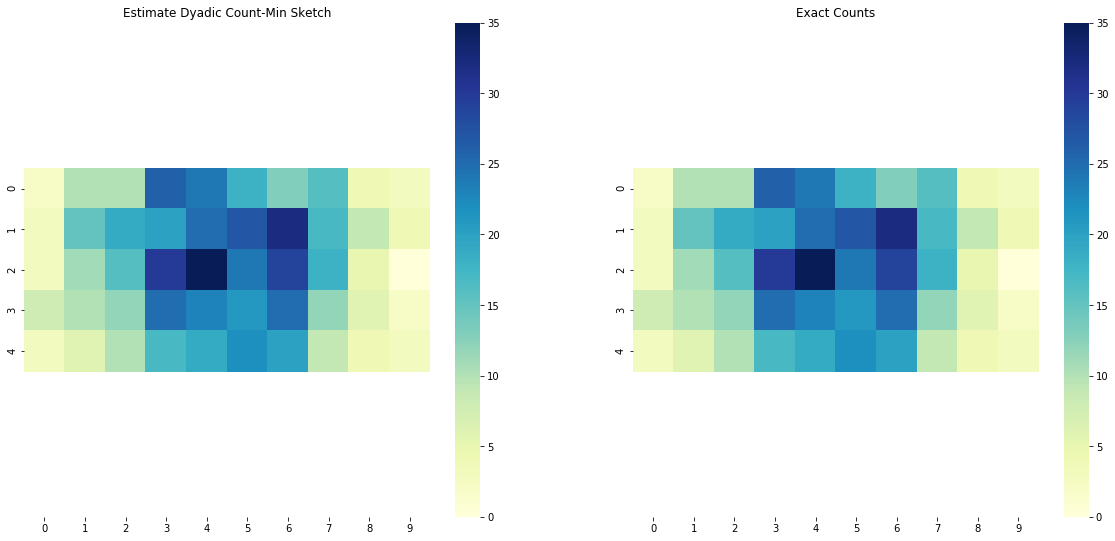

In [72]:
mu, sigma = 5000, 900 # mean and standard deviation
size = 1000
data = np.asarray([np.random.normal(mu, sigma, size).astype(np.int32), np.random.normal(mu, sigma, size).astype(np.int32)]).T
create_and_compare_heatmaps_new(data,3000,7000,10,4000,6000,5, tDCMS=tDCMS)

In [73]:
jsonStr = json.dumps(tDCMS.__dict__, indent=2, cls=CMSEncoder)

text_file = open("test_dmap.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [59]:
gr = calculateGridRanges3(3000,7000,10,4000,6000,5)
print(gr.shape)
i = 0
k = 0 
for row in gr:
    for cell in row:
        print("{},{}: {} - {} ; {} - {}".format(k,i,cell.x_low, cell.x_high, cell.y_low, cell.y_high))
        i+=1
    i=0
    k+=1

(5, 10)
0,0: 3000 - 3399 ; 4000 - 4399
0,1: 3400 - 3799 ; 4000 - 4399
0,2: 3800 - 4199 ; 4000 - 4399
0,3: 4200 - 4599 ; 4000 - 4399
0,4: 4600 - 4999 ; 4000 - 4399
0,5: 5000 - 5399 ; 4000 - 4399
0,6: 5400 - 5799 ; 4000 - 4399
0,7: 5800 - 6199 ; 4000 - 4399
0,8: 6200 - 6599 ; 4000 - 4399
0,9: 6600 - 6999 ; 4000 - 4399
1,0: 3000 - 3399 ; 4400 - 4799
1,1: 3400 - 3799 ; 4400 - 4799
1,2: 3800 - 4199 ; 4400 - 4799
1,3: 4200 - 4599 ; 4400 - 4799
1,4: 4600 - 4999 ; 4400 - 4799
1,5: 5000 - 5399 ; 4400 - 4799
1,6: 5400 - 5799 ; 4400 - 4799
1,7: 5800 - 6199 ; 4400 - 4799
1,8: 6200 - 6599 ; 4400 - 4799
1,9: 6600 - 6999 ; 4400 - 4799
2,0: 3000 - 3399 ; 4800 - 5199
2,1: 3400 - 3799 ; 4800 - 5199
2,2: 3800 - 4199 ; 4800 - 5199
2,3: 4200 - 4599 ; 4800 - 5199
2,4: 4600 - 4999 ; 4800 - 5199
2,5: 5000 - 5399 ; 4800 - 5199
2,6: 5400 - 5799 ; 4800 - 5199
2,7: 5800 - 6199 ; 4800 - 5199
2,8: 6200 - 6599 ; 4800 - 5199
2,9: 6600 - 6999 ; 4800 - 5199
3,0: 3000 - 3399 ; 5200 - 5599
3,1: 3400 - 3799 ; 5200 - 5599


In [83]:
tdCMS2 = TupleDyadicCountMinSketch()
# cms = TupleCountMinSketch(eps=0.015, delta=0.01)
# plot_planeDyadicCover(tdCMS.planeMinimalDyadicCover(100,200,100,150))

mean = 1000
scale = 200
counts = np.zeros((4*scale, 4*scale))
m = 50000
out_of_bounds = 0
for i in np.arange(m):
    x = int(np.random.normal(mean, scale=scale))
    y = int(np.random.normal(mean, scale=scale))
    x_origin = x-(mean-2*scale)
    y_origin = y-(mean-2*scale)
    if x_origin >= 0 and y_origin >=0 and x_origin < 4*scale and y_origin < 4*scale:
#         print(str(x)+" : "+str(y))
#         print(str(x_origin)+" : "+str(y_origin))
        counts[x_origin,y_origin] += 1
    else:
        out_of_bounds+=1
    tdCMS2.update(x,y)
#     cms.update(x,y)
print(out_of_bounds)

4463


Dyadic Count-Min Sketch:
Absolute error mean: 100.6168
Relative error mean: 0.002012336
Absolute error max: 199.0
Relative error max: 0.00398


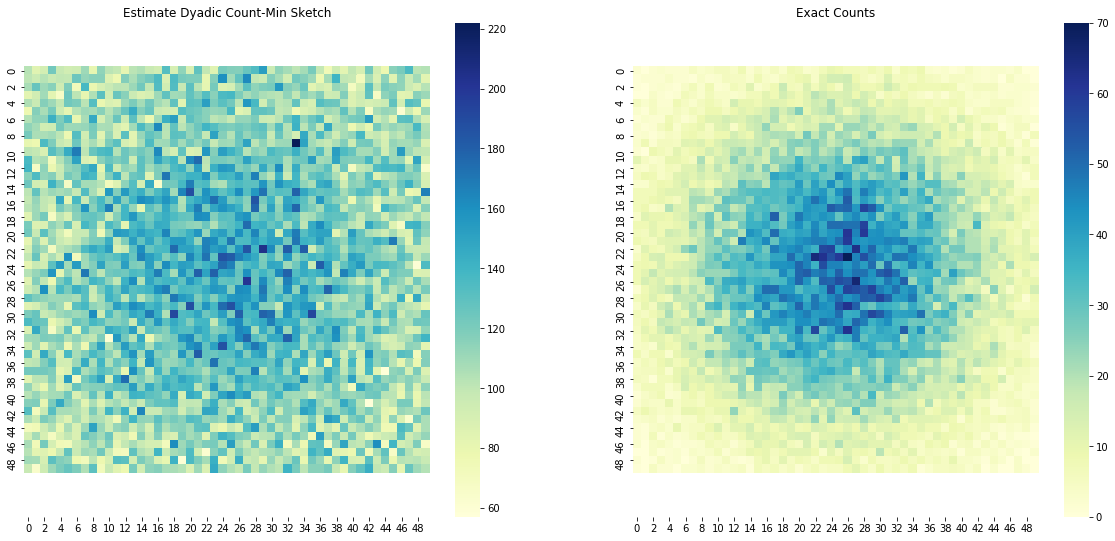

In [84]:
create_and_compare_heatmaps(mean-2*scale, mean+2*scale, mean-2*scale, mean+2*scale, 16, tdCMS2, counts, mean, scale, m)

Dyadic Count-Min Sketch:
Absolute error mean: 28.5608
Relative error mean: 0.000571216
Absolute error max: 78.0
Relative error max: 0.00156
Count-Min Sketch:
Absolute error mean: 3193.488
Relative error mean: 0.06386976
Absolute error max: 3349.0
Relative error max: 0.06698


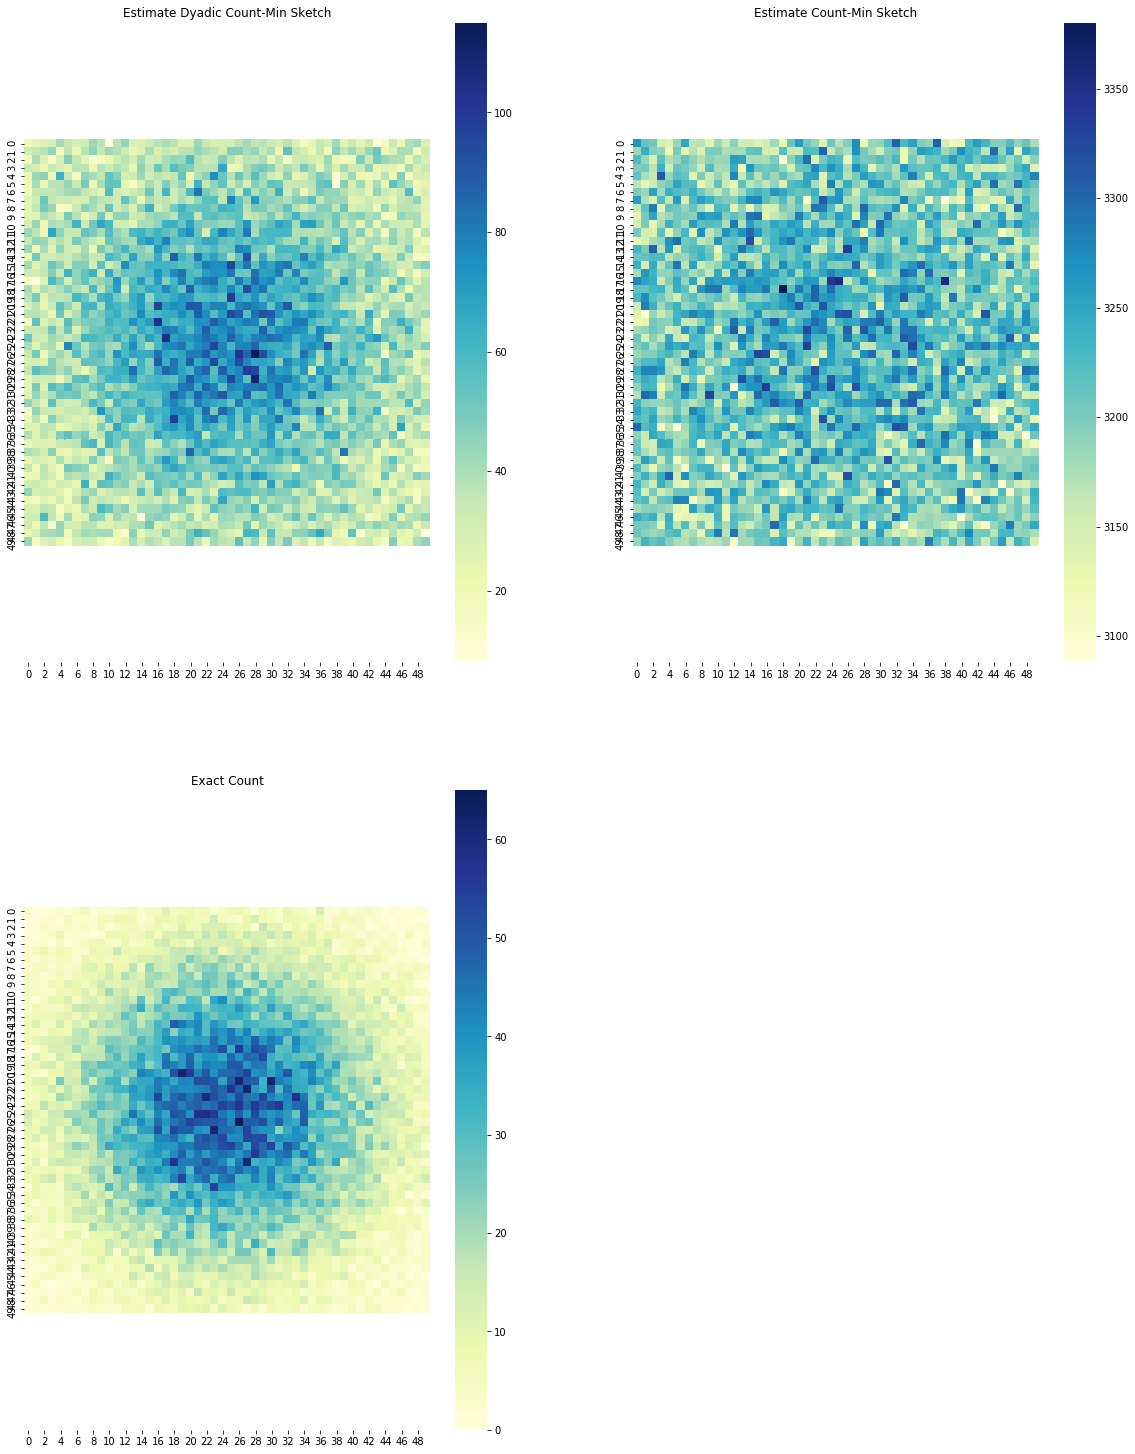

In [95]:
# calculateGridRanges(0, 100, 0, 100, 10).shape
create_and_compare_heatmaps2(mean-2*scale, mean+2*scale, mean-2*scale, mean+2*scale, 16, tdCMS, cms, counts, mean, scale, m)

(291,)


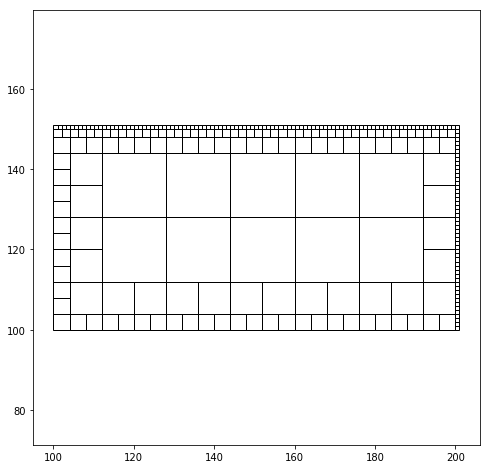

In [105]:
plot_planeDyadicCover(planeMinimalDyadicCover(100,200,100,150))

76


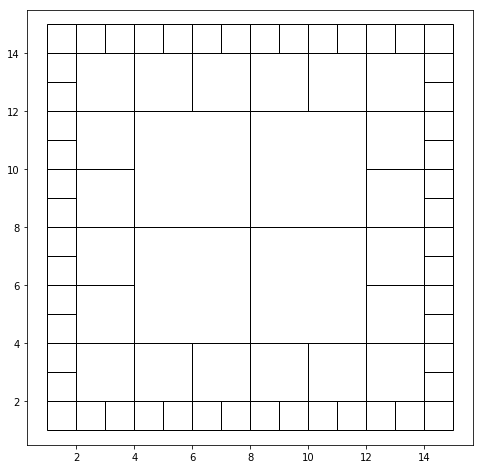

your result: 76
your result: 76


In [41]:
test = TupleDyadicCountMinSketch()
Mx = 2**4
M = Mx*Mx
l = int(np.log2(Mx))
plot_planeDyadicCover(test.planeMinimalDyadicCover(1,2**l-2,1,2**l-2))
# print("your result: "+str(1+(4*(2**(l-1)-1)+1)*(l-1)))
n=l-1

print("your result: "+str(4*(-3*n+2**(n+2)-4)))
# print("your result: "+str(4*(-3*()+2**(n+2)-4)))
print("your result: "+str(-12*l+8*2**l-4))

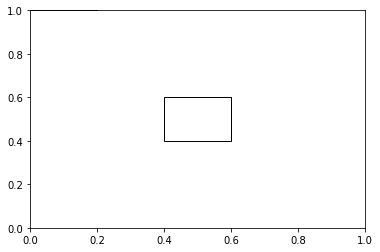

In [78]:
someX, someY = 0.5, 0.5
fig,ax = plt.subplots()
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX - 0.1, someY - 0.1), 0.2, 0.2,
                      alpha=1, fill=None))

currentAxis.add_patch(Rectangle((0, 1), 0.2, 0.2,
                      alpha=1, fill=None))
plt.show()

In [30]:
# np.random.randint(-2**63+1,2**63-1,size=(1,32), dtype='int64')
# ma = 0
# for i in np.arange(50000):
#     actual = np.random.normal(1000, scale=200)
#     if ma < actual:
#         ma = actual
        
# ma
# for d in dCMS.minimalDyadicCover(-10,0):
#     print(str(d.low)+" - "+str(d.high)+" : "+str(d.level)+" - "+str(d.index))

for d in dCMS.planeMinimalDyadicCover(12,20,12,20):
    print("{} - {} ; {} - {} ; {} : {}".format(d.x_low, d.x_high, d.y_low, d.y_high, d.level, d.index))

20 - 20 ; 20 - 20 ; 0 : 655380
20 - 20 ; 12 - 12 ; 0 : 393236
20 - 20 ; 13 - 13 ; 0 : 426004
20 - 20 ; 14 - 14 ; 0 : 458772
20 - 20 ; 15 - 15 ; 0 : 491540
20 - 20 ; 16 - 16 ; 0 : 524308
20 - 20 ; 17 - 17 ; 0 : 557076
20 - 20 ; 18 - 18 ; 0 : 589844
20 - 20 ; 19 - 19 ; 0 : 622612
12 - 12 ; 20 - 20 ; 0 : 655372
13 - 13 ; 20 - 20 ; 0 : 655373
14 - 14 ; 20 - 20 ; 0 : 655374
15 - 15 ; 20 - 20 ; 0 : 655375
12 - 15 ; 12 - 15 ; 2 : 24579
12 - 15 ; 16 - 19 ; 2 : 32771
16 - 16 ; 20 - 20 ; 0 : 655376
17 - 17 ; 20 - 20 ; 0 : 655377
18 - 18 ; 20 - 20 ; 0 : 655378
19 - 19 ; 20 - 20 ; 0 : 655379
16 - 19 ; 12 - 15 ; 2 : 24580
16 - 19 ; 16 - 19 ; 2 : 32772


# Sketches Generation 

In [389]:
# Count-Min Sketches
# Uniform
uniform = pd.read_csv('dataGeneration/uniform_int-1-10k-1M.gz', compression='gzip', header=None)
n = 10000
cms = CountMinSketch(eps=0.015, delta=0.01)
for element in uniform.values:
    cms.update(element)
jsonStr = json.dumps(cms.__dict__, indent=2, cls=CMSEncoder)

text_file = open("cms_uniform_int-1-10k-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

4294967295
{
  "exactCounters": false, 
  "maxNum": 2147483647, 
  "hashFunctions": {
    "bits": 32, 
    "q_matrices": [
      [
        -1145740531, 
        -159082128, 
        35655725, 
        1512585919, 
        -757306449, 
        -1494358345, 
        409053880, 
        410892365, 
        1934703408, 
        1992606082, 
        1211216009, 
        -1387519567, 
        -1507951351, 
        -1489357081, 
        -1198885198, 
        1580848319, 
        -79892396, 
        1583451919, 
        1437092907, 
        594438784, 
        -1548409835, 
        892503887, 
        1750450096, 
        -100628597, 
        2038607871, 
        530098463, 
        1259220915, 
        -1705410550, 
        2125671390, 
        1329203898, 
        1908320692, 
        -1731470504
      ], 
      [
        -1510157410, 
        -810243841, 
        1347703129, 
        2016316670, 
        1379183485, 
        -632823066, 
        -214460628, 
        451296064, 
        -202

In [369]:
# Count-Min Sketches
# Normal
normal = pd.read_csv('dataGeneration/normal_int-5k-900-1M.gz', compression='gzip', header=None)
n = 10000
cms_normal = CountMinSketch(eps=0.015, delta=0.01)
for element in normal.values:
    cms_normal.update(element)
jsonStr = json.dumps(cms_normal.__dict__, indent=2, cls=CMSEncoder)

text_file = open("cms_normal_int-5k-900-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

{
  "exactCounters": false, 
  "maxNum": 2147483647, 
  "hashFunctions": {
    "bits": 32, 
    "q_matrices": [
      [
        -1733278267, 
        1704299341, 
        1548480564, 
        -67981127, 
        1589749641, 
        -1262997672, 
        -218431063, 
        390371454, 
        750209572, 
        -275830920, 
        813980891, 
        -1741341548, 
        866836007, 
        546129486, 
        1633651862, 
        197309826, 
        51127158, 
        -686575050, 
        -1117858579, 
        -537248400, 
        -1042585860, 
        -302551001, 
        982490769, 
        2010799273, 
        858038903, 
        22885037, 
        1380835529, 
        1984138513, 
        -318127804, 
        49037408, 
        -1150494102, 
        -374207721
      ], 
      [
        -368270286, 
        -159697129, 
        98605167, 
        280895591, 
        -1296237105, 
        1225834611, 
        -1313405198, 
        620713112, 
        1434673961, 
        118624

In [379]:
print(cms_normal.query(100))
print(cms_normal.query(101))
print(cms_normal.query(150))
print(cms_normal.query(5500))
print(cms_normal.query(-7885))
print(cms_normal.query(5000))
# f1 = -1031166304
# f2 = 2663572620
# print(f1 ^ f2)

# # intN(f1 ^ f2, 32) 

# n1 = f1 ^ f2
# bin_n1 = ""
# for i in np.arange(32):
#     bin_n1 += str(n1&1)
#     n1>>=1
# print(bin_n1[::-1])
# print(int(bin_n1[::-1],2))
# print(int32(f1 ^ f2))
# # 2746531284 > 2**31-1

140
0
6
402
15
451


In [380]:
# Count-Min Sketches
# Zipf
zipf = pd.read_csv('dataGeneration/zipf_int-2-1M.gz', compression='gzip', header=None)
n = 10000
cms_zipf = CountMinSketch(eps=0.015, delta=0.01)
for element in zipf.values:
    cms_zipf.update(element)
jsonStr = json.dumps(cms_zipf.__dict__, indent=2, cls=CMSEncoder)

text_file = open("cms_zipf_int-2-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

{
  "exactCounters": false, 
  "maxNum": 2147483647, 
  "hashFunctions": {
    "bits": 32, 
    "q_matrices": [
      [
        1688612310, 
        -298298877, 
        -216665849, 
        -1006589008, 
        1414724095, 
        -301143655, 
        174821779, 
        -1869205762, 
        399338323, 
        -273020764, 
        -1083657281, 
        -614742340, 
        66809143, 
        1687351535, 
        -635608093, 
        869081627, 
        849503452, 
        -1339066474, 
        -1707872114, 
        -1614303109, 
        1002369935, 
        350037112, 
        -1361968025, 
        947818570, 
        -1240381720, 
        1751435916, 
        -214421990, 
        524293706, 
        -940781682, 
        -8417294, 
        -1891371902, 
        1363763142
      ], 
      [
        720177635, 
        -789681093, 
        -103123806, 
        762908327, 
        -1086127804, 
        -913437330, 
        1141560673, 
        262905567, 
        1304869309, 
       

In [18]:
# DMAP Count-Min Sketches
# Uniform
uniform = pd.read_csv('dataGeneration/uniform_int-1-10k-1M.gz', compression='gzip', header=None)
n = 1
dCMS = DyadicCountMinSketch()
for element in uniform.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    dCMS.update(element)
    n+=1
jsonStr = json.dumps(dCMS.__dict__, indent=2, cls=CMSEncoder)

text_file = open("cms_dmap_uniform_int-1-10k-1M.json", "w")
n1 = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

{
  "cm_sketches": [
    {
      "exactCounters": false, 
      "maxNum": 46341, 
      "hashFunctions": {
        "bits": 32, 
        "q_matrices": [
          [
            1876635800, 
            -1109726006, 
            1566283978, 
            462457872, 
            998576562, 
            268280474, 
            -371164832, 
            845629963, 
            -1385915669, 
            1869297344, 
            -432423387, 
            1376849802, 
            -1179943862, 
            1417224863, 
            -918476188, 
            -1081369146, 
            1296804481, 
            836678289, 
            -303537885, 
            -1417533598, 
            1598568492, 
            1338480595, 
            700824826, 
            269943296, 
            1769619778, 
            -944981473, 
            831607201, 
            1043120834, 
            -327328635, 
            -1500415021, 
            321057356, 
            1974446592
          ], 
          [
            -33

In [18]:
# DMAP Count-Min Sketches
# Normal
normal = pd.read_csv('dataGeneration/normal_int-5k-900-1M.gz', compression='gzip', header=None)
n = 1
dCMS_normal = DyadicCountMinSketch()
for element in normal.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    dCMS_normal.update(element)
    n+=1
jsonStr = json.dumps(dCMS.__dict__, indent=2, cls=CMSEncoder)

text_file = open("cms_dmap_normal_int-5k-900-1M.json", "w")
n1 = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

KeyboardInterrupt: 

In [21]:
# DMAP Count-Min Sketches
# Zipf
zipf = pd.read_csv('dataGeneration/zipf_int-2-1M.gz', compression='gzip', header=None)
n = 1
dCMS_zipf = DyadicCountMinSketch()
for element in zipf.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    if(element < dCMS_zipf.maxNum):
        dCMS_zipf.update(element)
    n+=1
jsonStr = json.dumps(dCMS_zipf.__dict__, indent=2, cls=CMSEncoder)

text_file = open("cms_dmap_zipf_int-2-1M.json", "w")
n1 = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

1
2
3
4
5
6
7
8
9
10
{
  "cm_sketches": [
    {
      "exactCounters": false, 
      "maxNum": 46341, 
      "hashFunctions": {
        "bits": 32, 
        "q_matrices": [
          [
            718288976, 
            -1695035407, 
            1579875711, 
            1976006620, 
            1903603348, 
            2120185340, 
            -1761444478, 
            -682293115, 
            -207533632, 
            -857305302, 
            -149224805, 
            -240530885, 
            -1416793470, 
            357721570, 
            480445165, 
            -1163427058, 
            -38087012, 
            1009719166, 
            -2082491443, 
            1766800792, 
            1836128191, 
            -1555247418, 
            1364463643, 
            1960979757, 
            -898143440, 
            -591248598, 
            -822426009, 
            465205577, 
            278794977, 
            1516605826, 
            1369867355, 
            -2021158348
          ], 
  

# Heat-Map Sketch Generation

In [28]:
# Tuple Count-Min Sketches
# Uniform
uniform = pd.read_csv('dataGeneration/2d_uniform_int-1-10k-1M.gz', compression='gzip', header=None)
n = 1

tcms = TupleCountMinSketch(eps=0.015, delta=0.01)
for element in uniform.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    tcms.update(element[0], element[1])
    n+=1
jsonStr = json.dumps(tcms.__dict__, indent=2, cls=CMSEncoder)

text_file = open("json-2d/cms_2d_uniform_int-1-10k-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

1
2
3
4
5
6
7
8
9
10
{
  "exactCounters": false, 
  "hashFunctions": {
    "bits": 30, 
    "q_matrices": [
      [
        430706823, 
        413100277, 
        -113681721, 
        -68608323, 
        93429937, 
        -353203497, 
        285028107, 
        -103878222, 
        -19372229, 
        410732449, 
        -527216287, 
        -281467579, 
        -155167256, 
        315932878, 
        -266105682, 
        10285729, 
        529056381, 
        502721148, 
        -349494534, 
        370189968, 
        370595299, 
        147972070, 
        -299422007, 
        -466794938, 
        141623313, 
        207324466, 
        246245646, 
        -130853106, 
        -434986296, 
        214497892
      ], 
      [
        -1581338, 
        -467333444, 
        -197991946, 
        489382957, 
        -288975538, 
        83216741, 
        -326677843, 
        455547436, 
        -33801344, 
        -529562754, 
        -175967620, 
        63343938, 
        -305831

In [29]:
# Tuple Count-Min Sketches
# Normal
normal = pd.read_csv('dataGeneration/2d_normal_int-5k-900-1M.gz', compression='gzip', header=None)
n = 1

tcms_normal = TupleCountMinSketch(eps=0.015, delta=0.01)
for element in normal.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    tcms_normal.update(element[0], element[1])
    n+=1
jsonStr = json.dumps(tcms_normal.__dict__, indent=2, cls=CMSEncoder)

text_file = open("json-2d/cms_2d_normal_int-5k-900-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

1
2
3
4
5
6
7
8
9
10
{
  "exactCounters": false, 
  "hashFunctions": {
    "bits": 30, 
    "q_matrices": [
      [
        -157809874, 
        531335939, 
        516285063, 
        434523708, 
        -482416544, 
        360255429, 
        443659350, 
        511852575, 
        184092138, 
        -19637220, 
        460747016, 
        -365262331, 
        -510084121, 
        133331500, 
        -434548538, 
        532886019, 
        278280669, 
        260035530, 
        431041140, 
        -361033491, 
        -79144107, 
        -455136406, 
        336087308, 
        -406985045, 
        469591688, 
        -410190403, 
        461101219, 
        -16220645, 
        69758652, 
        300511513
      ], 
      [
        -192735257, 
        -93639729, 
        -294850108, 
        -415107848, 
        -82689324, 
        -35684758, 
        470411299, 
        -283938443, 
        305152446, 
        -471497665, 
        -516831865, 
        -343122505, 
        31173

In [30]:
# Tuple Count-Min Sketches
# Zipf
zipf = pd.read_csv('dataGeneration/2d_zipf_int-2-1M.gz', compression='gzip', header=None)
n = 1

tcms_zipf = TupleCountMinSketch(eps=0.015, delta=0.01)
for element in zipf.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    tcms_zipf.update(element[0], element[1])
    n+=1
jsonStr = json.dumps(tcms_zipf.__dict__, indent=2, cls=CMSEncoder)

text_file = open("json-2d/cms_2d_zipf_int-2-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

1
2
3
4
5
6
7
8
9
10
{
  "exactCounters": false, 
  "hashFunctions": {
    "bits": 30, 
    "q_matrices": [
      [
        148795622, 
        349339238, 
        485761516, 
        -203014878, 
        134433952, 
        -363246927, 
        -69424339, 
        459760897, 
        7319695, 
        512314733, 
        83429215, 
        -373465286, 
        -3926861, 
        -29705430, 
        -73892243, 
        -208624148, 
        319654308, 
        -387393393, 
        -80797838, 
        -44469879, 
        192345313, 
        -344451831, 
        501232792, 
        -343541700, 
        2393619, 
        356043658, 
        -439632568, 
        364701416, 
        -323186463, 
        377903152
      ], 
      [
        53428181, 
        -271228527, 
        -509482130, 
        -273204103, 
        -30600272, 
        -380162346, 
        -117451280, 
        -215999552, 
        84987478, 
        93921329, 
        -60682329, 
        241329341, 
        -168981516, 
 

In [26]:
# Tuple DMAP Count-Min Sketches
# Uniform
uniform = pd.read_csv('dataGeneration/2d_uniform_int-1-10k-1M.gz', compression='gzip', header=None)
n = 1

dCMS = TupleDyadicCountMinSketch(eps=0.015, delta=0.01)
for element in uniform.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    dCMS.update(element[0], element[1])
    n+=1
jsonStr = json.dumps(dCMS.__dict__, indent=2, cls=CMSEncoder)

text_file = open("json-2d/cms_dmap_2d_uniform_int-1-10k-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

1
2
3
4
5
6
7
8
9
10
{
  "cm_sketches": [
    {
      "exactCounters": false, 
      "hashFunctions": {
        "bits": 30, 
        "q_matrices": [
          [
            233632181, 
            -268570198, 
            -202690975, 
            -120409695, 
            -339888097, 
            35092860, 
            -414259496, 
            -214693612, 
            323813313, 
            397216182, 
            280160602, 
            -244598591, 
            -313832721, 
            -372471507, 
            -187862842, 
            -249294995, 
            -188871865, 
            71814735, 
            15186428, 
            -496016468, 
            114133457, 
            -192583832, 
            -31224990, 
            -479528044, 
            17807042, 
            -390336837, 
            -463413759, 
            -498857150, 
            402864279, 
            439303404
          ], 
          [
            296316666, 
            478033093, 
            -520501944, 
        

In [18]:
# Tuple DMAP Count-Min Sketches
# Normal
normal = pd.read_csv('dataGeneration/2d_normal_int-5k-900-1M.gz', compression='gzip', header=None)
n = 1

# dCMS_normal = TupleDyadicCountMinSketch(eps=0.015, delta=0.01)
dCMS_normal = TupleDyadicCountMinSketch(eps=0.0015, delta=0.01)
for element in normal.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    dCMS_normal.update(element[0], element[1])
    n+=1
jsonStr = json.dumps(dCMS_normal.__dict__, indent=2, cls=CMSEncoder)

text_file = open("json-2d/cms_dmap_2d_normal_int-5k-900-1M-0.0015.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

1
2
3
4
5
6
7
8
9
10


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
# Tuple DMAP Count-Min Sketches
# Zipf
zipf = pd.read_csv('dataGeneration/2d_zipf_int-2-1M.gz', compression='gzip', header=None)
n = 1

dCMS_zipf = TupleDyadicCountMinSketch(eps=0.015, delta=0.01)
for element in zipf.values:
    if(n % 100000 == 0):
        print(int(n/100000))
    if(element[0] <= 2**15-1 and element[1] <= 2**15-1):
        dCMS_zipf.update(element[0], element[1])
    n+=1
jsonStr = json.dumps(dCMS_zipf.__dict__, indent=2, cls=CMSEncoder)

text_file = open("json-2d/cms_dmap_2d_zipf_int-2-1M.json", "w")
n = text_file.write(jsonStr)
text_file.close()
print(jsonStr)

1
2
3
4
5
6
7
8
9
10
{
  "cm_sketches": [
    {
      "exactCounters": false, 
      "hashFunctions": {
        "bits": 30, 
        "q_matrices": [
          [
            -528227659, 
            130122665, 
            297977397, 
            -118643538, 
            -379917503, 
            -26402726, 
            486788676, 
            -90967719, 
            404451206, 
            -516841092, 
            209333238, 
            -140969552, 
            285953696, 
            301174205, 
            19478276, 
            -508643030, 
            478527811, 
            -114446137, 
            -124340742, 
            -311627711, 
            36760270, 
            -79616617, 
            372789757, 
            256126167, 
            -227839964, 
            -469200800, 
            100138860, 
            -253605389, 
            173332393, 
            498662154
          ], 
          [
            115266364, 
            -383071716, 
            -70408253, 
            

[[634. 686. 694. ... 723. 708. 703.]
 [712. 685. 664. ... 672. 692. 695.]
 [706. 713. 696. ... 691. 693. 663.]
 ...
 [684. 705. 697. ... 712. 677. 705.]
 [698. 635. 677. ... 686. 702. 657.]
 [719. 676. 693. ... 683. 716. 675.]]


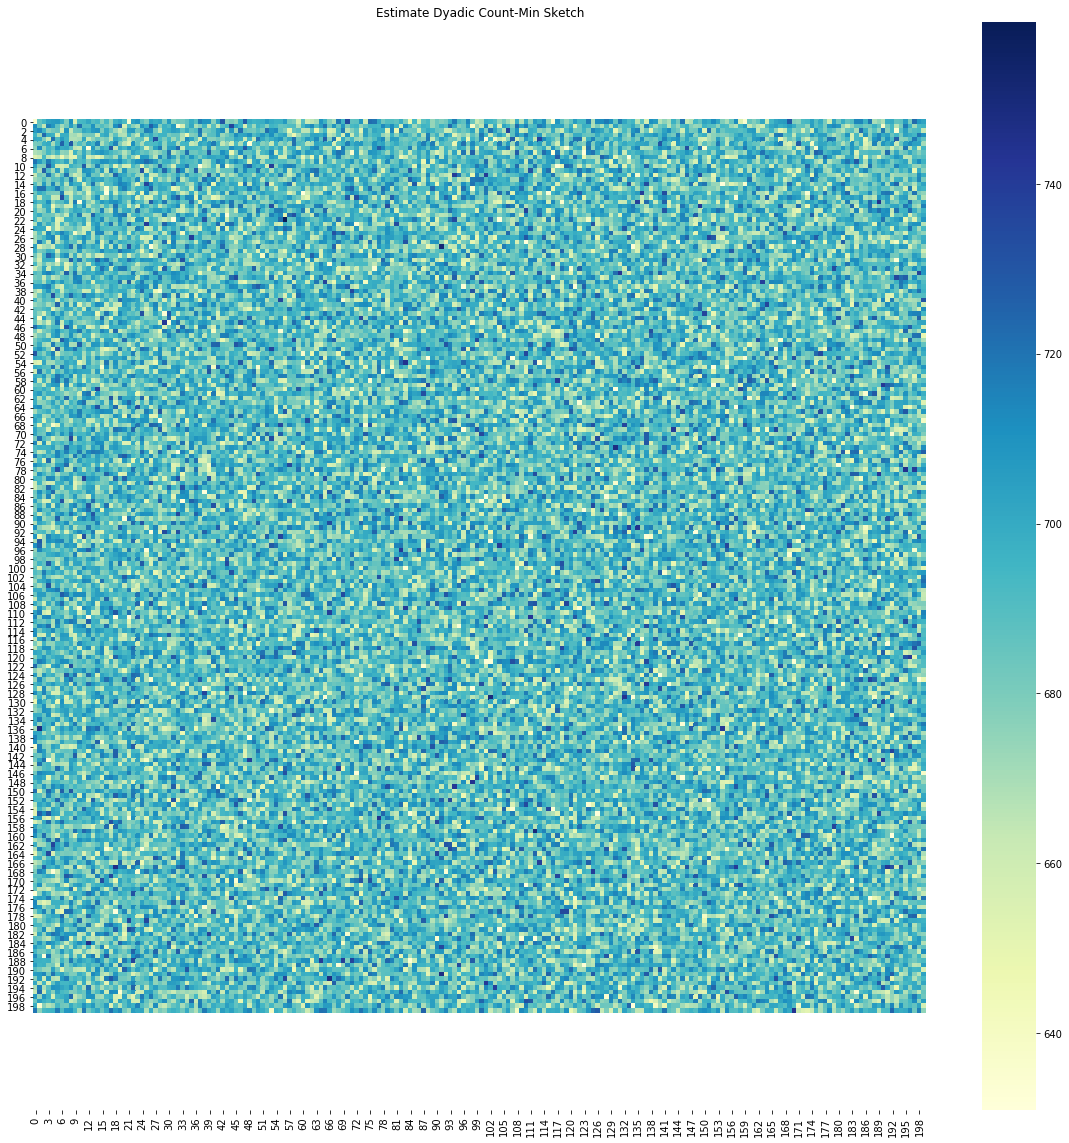

In [85]:
# for i in np.arange(0,10):
#     x = int((5000+i)/2**tcms_normal.level)
#     y = int(5000/2**tcms_normal.level)
#     index = y*tcms_normal.x_max_index+x
# #     print(tcms_normal.hashFunctions.hashF(index))
#     print("{} - {} ; {} = {}".format(x,y, index, tcms_normal.query_with_index(index)))
# D=dCMS_normal.planeMinimalDyadicCover(4500, 5500, 4500, 5500)
# n = 0
# # for d in D:
# #     if n == 10:
# #         break
# #     print("{} - {} ; {} - {} ; {} : {}".format(d.x_low, d.x_high, d.y_low, d.y_high, d.level, d.index))
# #     n+=1
    
# print("{} - {} ; {} - {} ; {} : {}".format(D[3783].x_low, D[3783].x_high, D[3783].y_low, D[3783].y_high, D[3783].level, D[3783].index))


# print(dCMS_normal.query_plane(4000, 4500, 4000, 4500))

# print(dCMS_normal.query_plane(4500, 5500, 4500, 5500))

# print(dCMS_normal.query_plane(5500, 6000, 5500, 6000))
# dCMS_normal.query_plane(5000, 5000, 5000, 5000)

gr = calculateGridRanges2(4900, 5100,200, 4900, 5100,200)
estimates = dCMS_normal.query_grids(gr)
print(estimates)

fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(1, 1, 1)
ax1.set_title("Estimate Dyadic Count-Min Sketch")
ax1 = sns.heatmap(estimates, ax=ax1, cmap="YlGnBu")
ax1.axis('equal')
plt.show()

# Evaluation Experiments

In [9]:
with open("json/cms_uniform_int-1-10k-1M.json") as f:
    data = json.load(f)
cms_json_uniform = CountMinSketch(json_dic=data)
for i in np.power(2, np.arange(7,14)):
    print(i)
    result = pd.read_csv('EvaluationExperiments/results/uniform_'+str(i)+'.csv', header=None)
    if i <= 64:
        buckets = calculateBucketRanges(1, 10001, i)
        estimate = cms_json_uniform.query_buckets(buckets)
    else:
        log2 = int(np.log2(i))
        estimate = np.zeros(0)
        for j in np.arange(0, 2**(log2-6)):
            buckets = calculateBucketRanges(j+1, 10001, i)
            curr_estimate = cms_json_uniform.query_buckets(buckets)
            estimate = np.concatenate((estimate, curr_estimate))
    result[3] = estimate
    result.to_csv('EvaluationExperiments/results/uniform_'+str(i)+'.csv', index=False, header=False)

128
256
512
1024
2048
4096
8192


In [11]:
with open("json/cms_normal_int-5k-900-1M.json") as f:
    data = json.load(f)
cms_json_normal = CountMinSketch(json_dic=data)
for i in np.power(2, np.arange(7,14)):
    print(i)
    result = pd.read_csv('EvaluationExperiments/results/normal_'+str(i)+'.csv', header=None)
    if i <= 64:
        buckets = calculateBucketRanges(1, 10001, i)
        estimate = cms_json_normal.query_buckets(buckets)
    else:
        log2 = int(np.log2(i))
        estimate = np.zeros(0)
        for j in np.arange(0, 2**(log2-6)):
            buckets = calculateBucketRanges(j+1, 10001, i)
            curr_estimate = cms_json_normal.query_buckets(buckets)
            estimate = np.concatenate((estimate, curr_estimate))
    result[3] = estimate
    result.to_csv('EvaluationExperiments/results/normal_'+str(i)+'.csv', index=False, header=False)

128
256
512
1024
2048
4096
8192


In [12]:
with open("json/cms_zipf_int-2-1M.json") as f:
    data = json.load(f)
cms_json_zipf = CountMinSketch(json_dic=data)
for i in np.power(2, np.arange(7,14)):
    print(i)
    result = pd.read_csv('EvaluationExperiments/results/zipf_'+str(i)+'.csv', header=None)
    if i <= 64:
        buckets = calculateBucketRanges(1, 10001, i)
        estimate = cms_json_zipf.query_buckets(buckets)
    else:
        log2 = int(np.log2(i))
        estimate = np.zeros(0)
        for j in np.arange(0, 2**(log2-6)):
            buckets = calculateBucketRanges(j+1, 10001, i)
            curr_estimate = cms_json_zipf.query_buckets(buckets)
            estimate = np.concatenate((estimate, curr_estimate))
    result[3] = estimate
    result.to_csv('EvaluationExperiments/results/zipf_'+str(i)+'.csv', index=False, header=False)

128
256
512
1024
2048
4096
8192


In [13]:
with open("json/cms_dmap_uniform_int-1-10k-1M.json") as f:
    data = json.load(f)
cms_dmap_json_uniform = DyadicCountMinSketch(json_dic=data)
for i in np.power(2, np.arange(7,14)):
    print(i)
    result = pd.read_csv('EvaluationExperiments/results/uniform_'+str(i)+'.csv', header=None)
    if i <= 64:
        buckets = calculateBucketRanges(1, 10001, i)
        estimate = cms_dmap_json_uniform.query_buckets(buckets)
    else:
        log2 = int(np.log2(i))
        estimate = np.zeros(0)
        for j in np.arange(0, 2**(log2-6)):
            buckets = calculateBucketRanges(j+1, 10001, i)
            curr_estimate = cms_dmap_json_uniform.query_buckets(buckets)
            estimate = np.concatenate((estimate, curr_estimate))
    result[4] = estimate
    result.to_csv('EvaluationExperiments/results/uniform_'+str(i)+'.csv', index=False, header=False)

128
256
512
1024
2048
4096
8192


In [14]:
with open("json/cms_dmap_normal_int-5k-900-1M.json") as f:
    data = json.load(f)
cms_dmap_json_normal = DyadicCountMinSketch(json_dic=data)
for i in np.power(2, np.arange(7,14)):
    print(i)
    result = pd.read_csv('EvaluationExperiments/results/normal_'+str(i)+'.csv', header=None)
    if i <= 64:
        buckets = calculateBucketRanges(1, 10001, i)
        estimate = cms_dmap_json_normal.query_buckets(buckets)
    else:
        log2 = int(np.log2(i))
        estimate = np.zeros(0)
        for j in np.arange(0, 2**(log2-6)):
            buckets = calculateBucketRanges(j+1, 10001, i)
            curr_estimate = cms_dmap_json_normal.query_buckets(buckets)
            estimate = np.concatenate((estimate, curr_estimate))
    result[4] = estimate
    result.to_csv('EvaluationExperiments/results/normal_'+str(i)+'.csv', index=False, header=False)

128
256
512
1024
2048
4096
8192


In [15]:
with open("json/cms_dmap_zipf_int-2-1M.json") as f:
    data = json.load(f)
cms_dmap_json_zipf = DyadicCountMinSketch(json_dic=data)
for i in np.power(2, np.arange(7,14)):
    print(i)
    result = pd.read_csv('EvaluationExperiments/results/zipf_'+str(i)+'.csv', header=None)
    if i <= 64:
        buckets = calculateBucketRanges(1, 10001, i)
        estimate = cms_dmap_json_zipf.query_buckets(buckets)
    else:
        log2 = int(np.log2(i))
        estimate = np.zeros(0)
        for j in np.arange(0, 2**(log2-6)):
            buckets = calculateBucketRanges(j+1, 10001, i)
            curr_estimate = cms_dmap_json_zipf.query_buckets(buckets)
            estimate = np.concatenate((estimate, curr_estimate))
    result[4] = estimate
    result.to_csv('EvaluationExperiments/results/zipf_'+str(i)+'.csv', index=False, header=False)

128
256
512
1024
2048
4096
8192
